In [8]:
from utils import *
from data_prep import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans

In [13]:
X = pd.read_csv(r'data.csv')
X.columns = X.columns.str.strip()

# print(X)
print(X.columns)

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [14]:


for col_name in X.columns :
    if 0 == np.var(X[col_name]):
        print("La colonne ", col_name, " a la même valeur sur chaque ligne : ", X[col_name][0])

X_noBank = X.drop(columns=['Bankrupt?', "Net Income Flag", "Liability-Assets Flag"]).copy()
X = X.drop(columns=["Net Income Flag", "Liability-Assets Flag"])



La colonne  Net Income Flag  a la même valeur sur chaque ligne :  1


## Valeurs aberantes q95 + 10000

In [16]:
### Bout de code maintenant implémenté dans la fonction filter_valeurs_aberrantes du fichier utils.py

#Detection des outliers quand valeur > quantile95% + 10000
filtered_X = X.copy()
threshold = 10000

columns_aberrantes = []
outlier_data = []

for col_name in X.columns : 
    quantile = np.quantile(X[col_name], 0.95)
    ecart_max_q = max(X[col_name]) - quantile
    if ecart_max_q > threshold:
        print("La colonne \"", col_name, "\" contient possiblement une valeur aberrante : max - quantile(0.95) = ", ecart_max_q)
        print(" - Nombre de valeurs aberrantes : ", X[col_name][X[col_name] > quantile + threshold].shape)
        print(" - Nombre de valeurs supérieures à 1 : ", X[col_name][X[col_name] > 1].shape)
        print(" - Nombre de valeurs aberrantes avec Bankrupt=1 : ", X.loc[(X[col_name] > quantile + threshold) & (X["Bankrupt?"] == 1)].shape[0])
        # 0 == X.loc[X.loc[X[col_name] > quantile + threshold]["Bankrupt?"] == 1].shape[0]

        columns_aberrantes.append(col_name)
        outlier_data.extend(filtered_X.loc[filtered_X[col_name] - quantile > threshold].to_dict(orient='records'))
        filtered_X = filtered_X.loc[filtered_X[col_name] - quantile <= threshold]
        
outlier_df = pd.DataFrame(outlier_data)    

print("Nombre de colonnes aberrantes : ", len(columns_aberrantes))
print("Nombre de lignes supprimées : ", filtered_X.shape[0] - X.shape[0])
print("Nombre de lignes supprimées avec bankrupt == 1 : ", outlier_df.loc[outlier_df["Bankrupt?"] == 1].shape[0])

print(outlier_df.shape)
# print("Nombre de lignes surpprimées avec bankrupt == 1", filtered_X.loc[filtered_X[]])
    
filtered_X, outlier_df =  filter_valeurs_aberrantes("data.csv")
        

La colonne " Operating Expense Rate " contient possiblement une valeur aberrante : max - quantile(0.95) =  1040000000.0
 - Nombre de valeurs aberrantes :  (337,)
 - Nombre de valeurs supérieures à 1 :  (2282,)
 - Nombre de valeurs aberrantes avec Bankrupt=1 :  12
La colonne " Research and development expense rate " contient possiblement une valeur aberrante : max - quantile(0.95) =  2270000000.0
 - Nombre de valeurs aberrantes :  (339,)
 - Nombre de valeurs supérieures à 1 :  (4033,)
 - Nombre de valeurs aberrantes avec Bankrupt=1 :  6
La colonne " Interest-bearing debt interest rate " contient possiblement une valeur aberrante : max - quantile(0.95) =  989999999.9987392
 - Nombre de valeurs aberrantes :  (221,)
 - Nombre de valeurs supérieures à 1 :  (221,)
 - Nombre de valeurs aberrantes avec Bankrupt=1 :  2
La colonne " Revenue Per Share (Yuan ¥) " contient possiblement une valeur aberrante : max - quantile(0.95) =  3019999999.8892646
 - Nombre de valeurs aberrantes :  (5,)
 - Nombr

24 colonnes présentent des valeurs aberrantes (détection arbitraire si une valeur dépasse le quantile à 95% + 10000)

2660 individus sont concernés dont 84 pour qui bankrupt == 1

Au final, 9 individus aberrants ont bankrupt = 0 et font partie de variables où aucun individu à bankrupt =1 n'est aberrant.

## Valeurs Aberrantes IQR (Inutile, trop de valeurs en dehors des whiskers des boxplots)

In [ ]:
#Detection des outliers quand valeur > quantile95% + 10000
filtered_X = X.copy()
threshold = 10000

columns_aberrantes = []
outlier_data = []

for col_name in X.drop(columns=['Bankrupt?']).columns : 
    IQR = np.quantile(X[col_name], 0.75) - np.quantile(X[col_name], 0.25)
    Upper_fence = np.quantile(X[col_name], 0.75) + 1.5*IQR
    if max(X[col_name]) > Upper_fence:
        print("La colonne \"", col_name, "\" contient possiblement une valeur aberrante : max - quantile(0.95) = ", ecart_max_q)
        print(" - Nombre de valeurs aberrantes : ", X[col_name][X[col_name] > Upper_fence].shape)
        print(" - Nombre de valeurs supérieures à 1 : ", X[col_name][X[col_name] > 1].shape)
        print(" - Upper fence : ", Upper_fence)
        print(" - Nombre de valeurs aberrantes avec Bankrupt=1 : ", X.loc[(X[col_name] > Upper_fence) & (X["Bankrupt?"] == 1)].shape[0])
        # 0 == X.loc[X.loc[X[col_name] > quantile + threshold]["Bankrupt?"] == 1].shape[0]

        columns_aberrantes.append(col_name)
        outlier_data.extend(filtered_X.loc[filtered_X[col_name] > Upper_fence].to_dict(orient='records'))
        filtered_X = filtered_X.loc[filtered_X[col_name] <= Upper_fence]
        
outlier_df = pd.DataFrame(outlier_data)    

print("Nombre de colonnes aberrantes : ", len(columns_aberrantes))
print("Nombre de lignes supprimées : ", filtered_X.shape[0] - X.shape[0])
print("Nombre de lignes supprimées avec bankrupt == 1 : ", outlier_df.loc[outlier_df["Bankrupt?"] == 1].shape[0])

print(outlier_df.shape)

## Observation des individus marqués comme aberrants

In [5]:
#OBSERVATION DES INDIVIDUS

column_count = outlier_df.apply(lambda row: (row > 10000).sum(), axis=1)

print(outlier_df.shape)

print(column_count)

print(max(column_count))

sns.histplot(column_count)

(2660, 94)
0       6
1       5
2       6
3       4
4       5
       ..
2655    3
2656    2
2657    5
2658    3
2659    3
Length: 2660, dtype: int64
9


<Axes: ylabel='Count'>

Pas d'effet d'"individu mal rempli", c'est à dire aucun individu où toutes les colonnes ont été mal renseignées

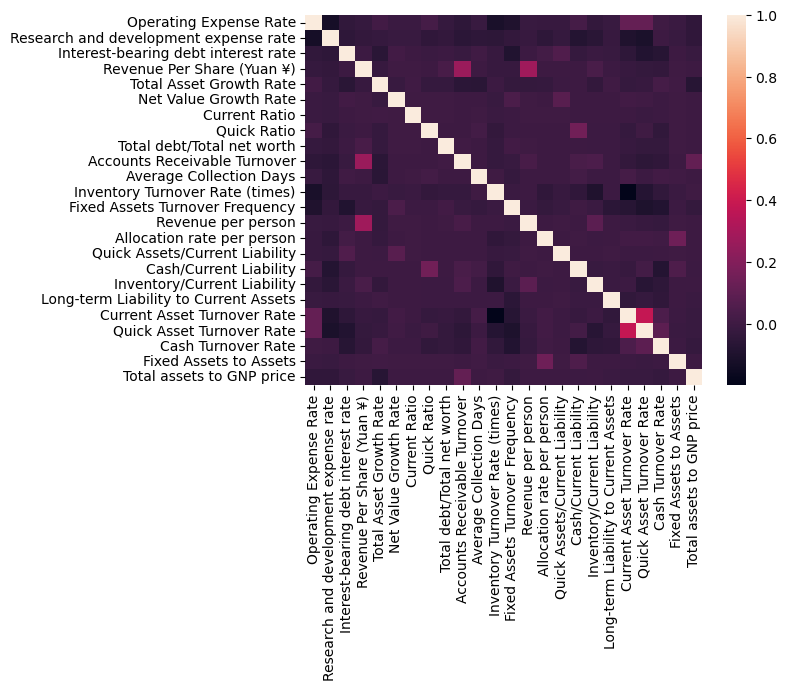

In [6]:
C = outlier_df[columns_aberrantes].corr()
sns.heatmap(C)
plt.show()

On voit ici qu'il n'y a pas de corrélation particulière entre les colonnes avec valeurs aberrantes au sein des individus possédant au moins une valeur aberrante

## Répartition Normale des valeurs

In [7]:
variables_loi_normale = []

for col_name in X_noBank.columns :
    pvalue = stats.shapiro(X_noBank[col_name]).pvalue
    if  pvalue >= 0.05 :
        print("La variable ", col_name, " suit une loi normale : pvalue = ", pvalue)
        variables_loi_normale.append(col_name)


c:\Users\benja\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Séparation du dataset en fonction de bankrupt

### Nettoyage des données

In [2]:
df = pd.read_csv('data.csv',sep=',')
df.corr()[abs(df.corr())>0.4].loc[:,' Revenue Per Share (Yuan ¥)'].sum()

1.0

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Load the data
df, _ = filter_valeurs_aberrantes("data.csv")
# réctifier les noms des colonnes
df.columns = df.columns.str.strip()
# df=df.drop(columns=['Net Income Flag'],axis=1) # Drop the column with only one value

## ignorer #####
# Only_categorigal_column=df['Liability-Assets Flag'].copy()
###############


# df=df.drop(columns=['Liability-Assets Flag'],axis=1) # Supprimer cette variable qualitative car elle n'apporte pas d'information utile.

# normaliser les données
original_df_X=df.drop(columns=['Bankrupt?']).copy()
scaler = StandardScaler()


#### ignorer ######
df_X = df.drop(columns=['Bankrupt?'])
df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)
df_y = df['Bankrupt?']
####################


La colonne " Operating Expense Rate " contient possiblement une valeur aberrante : max - quantile(0.95) =  1040000000.0
 - Nombre de valeurs aberrantes :  (337,)
 - Nombre de valeurs supérieures à 1 :  (2282,)
 - Nombre de valeurs aberrantes avec Bankrupt=1 :  12
La colonne " Research and development expense rate " contient possiblement une valeur aberrante : max - quantile(0.95) =  2270000000.0
 - Nombre de valeurs aberrantes :  (339,)
 - Nombre de valeurs supérieures à 1 :  (4033,)
 - Nombre de valeurs aberrantes avec Bankrupt=1 :  6
La colonne " Interest-bearing debt interest rate " contient possiblement une valeur aberrante : max - quantile(0.95) =  989999999.9987392
 - Nombre de valeurs aberrantes :  (221,)
 - Nombre de valeurs supérieures à 1 :  (221,)
 - Nombre de valeurs aberrantes avec Bankrupt=1 :  2
La colonne " Revenue Per Share (Yuan ¥) " contient possiblement une valeur aberrante : max - quantile(0.95) =  3019999999.8892646
 - Nombre de valeurs aberrantes :  (5,)
 - Nombr

In [18]:
strong_corr_threshold = 0.7
pd_corr=df_X.corr()
np.fill_diagonal(pd_corr.values, 0)
high_corr=pd_corr[abs(pd_corr)>strong_corr_threshold]
#high_corr=high_corr.stack().reset_index()
#high_corr=high_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'})

list_high_corr=[]
for i in range(len(high_corr)):
    tempo_list=[]
    tempo_list.append(high_corr.index[i])
    for j in range(len(high_corr.columns)):
        if abs(high_corr.iloc[i,j])>strong_corr_threshold:
            tempo_list.append(high_corr.columns[j])
    if len(tempo_list)>1:
        list_high_corr.append(tempo_list)


In [19]:
from collections import defaultdict, deque


strong_corr_threshold = 0.7
pd_corr=df_X.corr()
np.fill_diagonal(pd_corr.values, 0)
high_corr=pd_corr[abs(pd_corr)>strong_corr_threshold]
#high_corr=high_corr.stack().reset_index()
#high_corr=high_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'})

list_high_corr=[]
for i in range(len(high_corr)):
    tempo_list=[]
    tempo_list.append(high_corr.index[i])
    for j in range(len(high_corr.columns)):
        if abs(high_corr.iloc[i,j])>strong_corr_threshold:
            tempo_list.append(high_corr.columns[j])
    if len(tempo_list)>1:
        list_high_corr.append(tempo_list)

def group_lists(lists):
    #graph
    element_to_list_ids = defaultdict(set)
    list_id_to_elements = {}
    
    for i, lst in enumerate(lists):
        list_id_to_elements[i] = set(lst)
        for element in lst:
            element_to_list_ids[element].add(i)

    #BFS
    visited = set()
    def bfs(start):
        queue = deque([start])
        component = []
        while queue:
            node = queue.popleft()
            if node not in visited:
                visited.add(node)
                component.append(node)
                for element in list_id_to_elements[node]:
                    for neighbor in element_to_list_ids[element]:
                        if neighbor not in visited:
                            queue.append(neighbor)
        return component

    components = []
    for list_id in range(len(lists)):
        if list_id not in visited:
            components.append(bfs(list_id))

    # regroupement des listes
    grouped_lists = []
    for component in components:
        combined_set = set()
        for list_id in component:
            combined_set.update(list_id_to_elements[list_id])
        grouped_lists.append(list(combined_set))

    return grouped_lists

grouped = group_lists(list_high_corr)
grouped


[['Net Income to Total Assets',
  'Operating Profit Per Share (Yuan ¥)',
  'Net Value Per Share (A)',
  'ROA(C) before interest and depreciation before interest',
  'Persistent EPS in the Last Four Seasons',
  'ROA(A) before interest and % after tax',
  'ROA(B) before interest and depreciation after tax',
  'Operating profit/Paid-in capital',
  'Net Value Per Share (B)',
  'Net Value Per Share (C)',
  'Net profit before tax/Paid-in capital',
  'Per Share Net profit before tax (Yuan ¥)',
  'Retained Earnings to Total Assets'],
 ['Realized Sales Gross Margin',
  'Gross Profit to Sales',
  'Operating Gross Margin'],
 ['Pre-tax net Interest Rate',
  'Cash Flow to Sales',
  'Continuous interest rate (after tax)',
  'Non-industry income and expenditure/revenue',
  'Operating Profit Rate',
  'Working capitcal Turnover Rate',
  'After-tax net Interest Rate'],
 ['Operating Funds to Liability',
  'CFO to Assets',
  'Cash Flow Per Share',
  'Cash Reinvestment %',
  'Cash flow rate'],
 ['Total Ass

In [20]:

columns_to_keep=['Net Income to Total Assets',
 'Gross Profit to Sales',
 'Operating Profit Rate',
 'Cash Flow to Sales',
 'Cash flow rate',
 'Regular Net Profit Growth Rate',
 'Net worth/Assets',
 'Liability to Equity',
 'Working Capital/Equity',
 'Total Asset Turnover',
 'Current Assets/Total Assets',
 'Current Liability to Liability',
 'Cash Flow to Total Assets'
]
merged_columns = [x for sublist in grouped for x in sublist]

# columns to keep : 
#columns_to_keep=["Net Value Per Share (A)","Gross Profit to Sales","After-tax Net Profit Growth Rate","Persistent EPS in the Last Four Seasons","Debt ratio %",
#                "After-tax net Interest Rate",'Operating Funds to Liability','Net Income to Total Assets','Cash Flow to Sales','Liability to Equity','Current Liability to Liability']
columns_nonCorrelated=[x for x in list(df_X.columns) if x not in merged_columns]
columns_nonCorrelated.extend(columns_to_keep)
columns_nonCorrelated.append("Bankrupt?")
#df_X=df_X[columns_nonCorrelated]
df_X
#############################################################################
#############################################################################
#############################################################################

ROA(C) before interest and depreciation before interest  \
0                                             -2.217730         
1                                             -0.674120         
2                                             -1.303771         
3                                             -1.735854         
4                                             -0.662073         
...                                                 ...         
6805                                          -0.189835         
6806                                          -0.495023         
6807                                          -0.535179         
6808                                           0.017372         
6809                                          -0.200275         

      ROA(A) before interest and % after tax  \
0                                  -2.045696   
1                                  -0.311360   
2                                  -0.908576   
3                                  -1.636200   
4                                  -0.308037   
...                                      ...   
6805                               -0.292255   
6806                               -0.310529   
6807                               -0.379471   
6808                                0.019227   
6809                                0.174553   

      ROA(B) before interest and depreciation after tax  \
0                                             -2.400037   
1                                             -0.598698   
2                                             -1.319929   
3                                             -1.556284   
4                                             -0.508327   
...                                                 ...   
6805                                          -0.168567   
6806                                          -0.477914   
6807                                          -0.535265   
6808                                           0.006962   
6809                                          -0.066030   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                  -0.395291                    -0.394598   
1                   0.144910                     0.146221   
2                  -0.395734                    -0.400370   
3                  -1.497867                    -1.498437   
4                  -0.559834                    -0.559330   
...                      ...                          ...   
6805               -0.210789                    -0.209440   
6806               -0.589106                    -0.588635   
6807                0.157772                     0.144889   
6808               -0.001893                    -0.000750   
6809                1.201804                     1.204326   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                  0.015103                  -0.023913   
1                  0.013317                   0.015766   
2                  0.006498                  -0.062845   
3                 -0.005627                  -0.017489   
4                  0.015406                   0.014630   
...                     ...                        ...   
6805               0.016863                   0.018081   
6806               0.016872                   0.018515   
6807               0.016277                   0.017435   
6808               0.023148                   0.025396   
6809              -0.053283                   0.386473   

      After-tax net Interest Rate  \
0                       -0.020288   
1                        0.016866   
2                       -0.052185   
3                       -0.008474   
4                        0.017092   
...                           ...   
6805                     0.019160   
6806                     0.018874   
6807                     0.018087   
6808                     0.024328   
6809                     0.357039   

      Non-industry income and expenditure/revenue  \
0          

In [3]:
df, _ = filter_valeurs_aberrantes("data.csv")
df_X, df_y = remove_heavilyCorr_normalize_df(df)

Nombre de colonnes aberrantes :  17
Nombre de lignes restantes :  5966
Nombre de lignes supprimées :  -853
Nombre de lignes supprimées avec bankrupt == 1 :  31
Colonnes qualitative déjà retirées


In [4]:

df_X["Bankrupt?"] = df_y


df_X_merged = df_X
# print(df_y)
# print(df_X["Bankrupt?"])
print(df_X_merged.columns, '\n', len(df_X_merged.columns))

Index(['Operating Profit Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Revenue Per Share (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'Regular Net Profit Growth Rate',
       'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate',
       'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio',
       'Current Ratio', 'Quick Ratio', 'Interest Expense Ratio',
       'Total debt/Total net worth', 'Net worth/Assets',
       'Long-term fund suitability ratio (A)', 'Total Asset Turnover',
       'Accounts Receivable Turnover', 'Average Collection Days',
       'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency',
       'Revenue per person', 'Operating profit per person',
       'Allocation rate per person', 'Current Assets/Total Assets',
       'Cash/Total Assets', 'Quick Assets/Current Liab

### Comparaison corrélations

(5055, 55)
(176, 55)


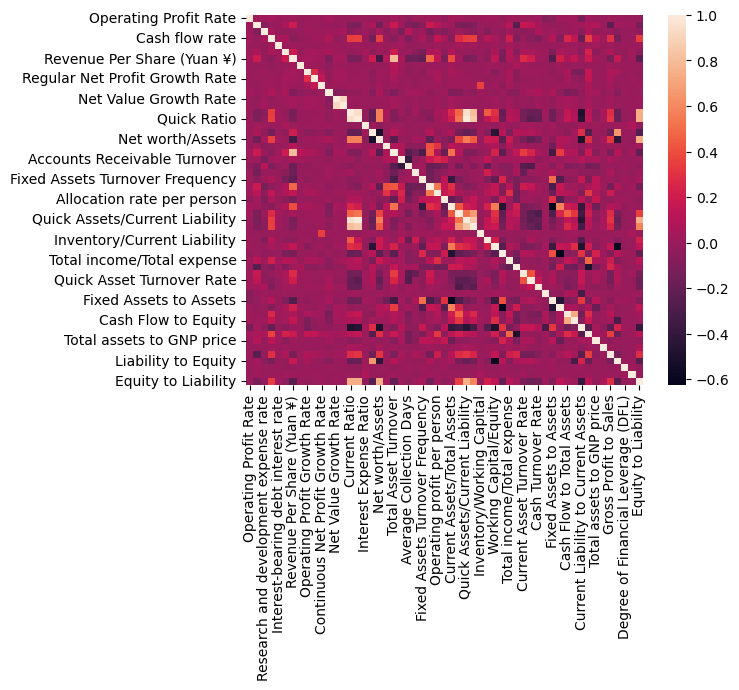

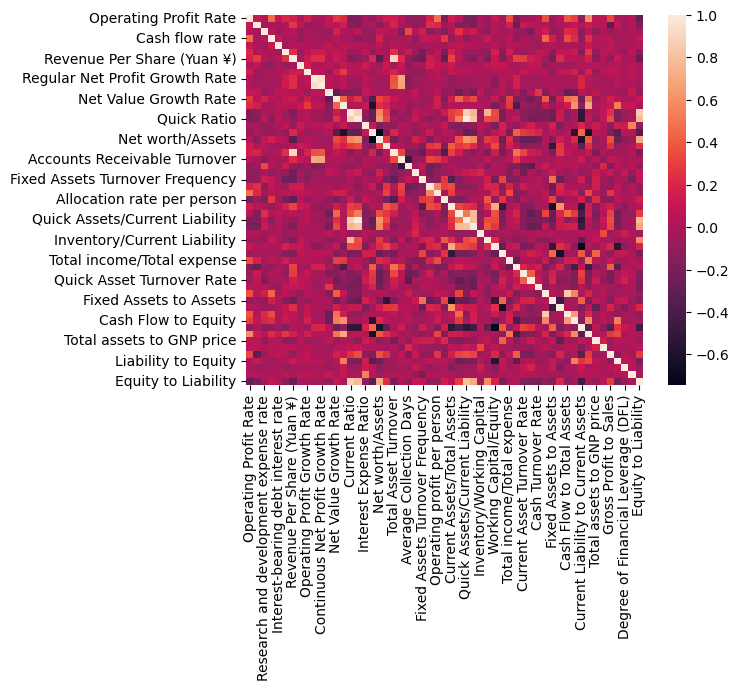

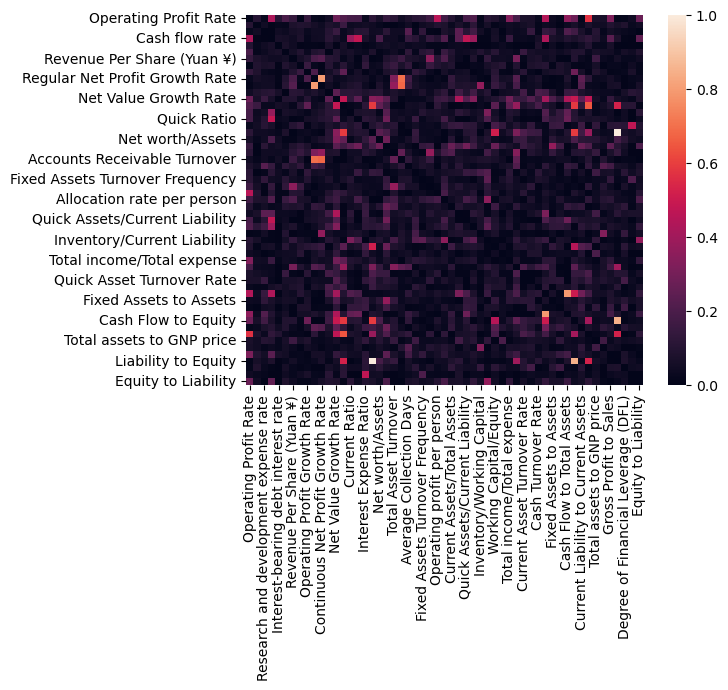

In [6]:
X_noBank_0 = df_X_merged.loc[df_X_merged["Bankrupt?"] == 0].drop(columns=["Bankrupt?"])
X_noBank_1 = df_X_merged.loc[df_X_merged["Bankrupt?"] == 1].drop(columns=["Bankrupt?"])

print(X_noBank_0.shape)
print(X_noBank_1.shape)

C0 = X_noBank_0.corr()
sns.heatmap(C0)
plt.show()

C1 = X_noBank_1.corr()
sns.heatmap(C1)
plt.show()


sns.heatmap(abs(C0-C1))
plt.show()

4
7


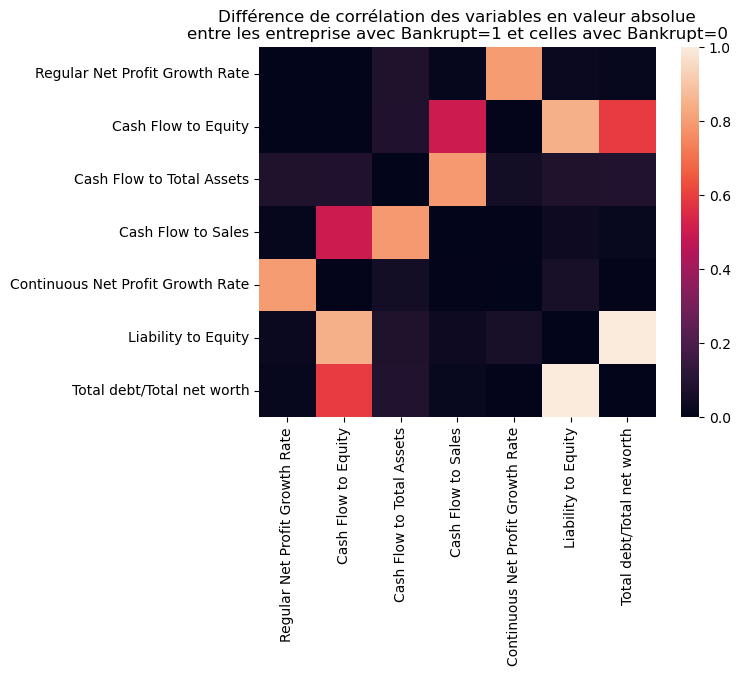

In [7]:
correlation_diff = []

index_diff = np.where(abs(C0-C1) > 0.7)

interesting_columns = set()

for x,y in zip(index_diff[0], index_diff[1]):
    if x>y:
        correlation_diff.append([X_noBank_0.columns[x], X_noBank_0.columns[y]])
        interesting_columns.add(X_noBank_0.columns[x])
        interesting_columns.add(X_noBank_0.columns[y])

print(len(correlation_diff))
print(len(interesting_columns))

X_0_interesting = X_noBank_0[list(interesting_columns)]
X_1_interesting = X_noBank_1[list(interesting_columns)]
C0_interesting = X_0_interesting.corr()
C1_interesting = X_1_interesting.corr()
sns.heatmap(abs(C0_interesting-C1_interesting))
plt.title("Différence de corrélation des variables en valeur absolue\nentre les entreprise avec Bankrupt=1 et celles avec Bankrupt=0")
plt.show()


Corrélation différentes entre bankrupt et pas bankrupt = évolution différentes => possibilité d'être utile pour la classification ?

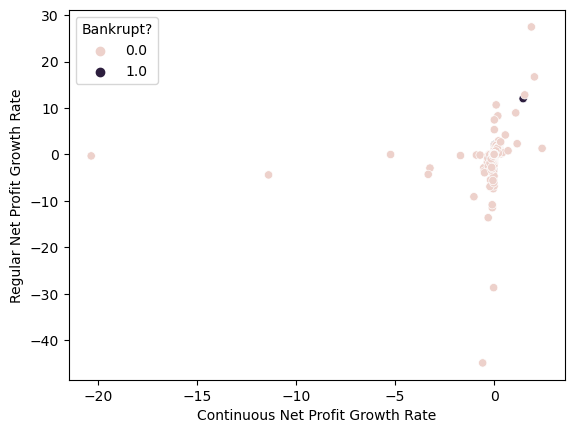

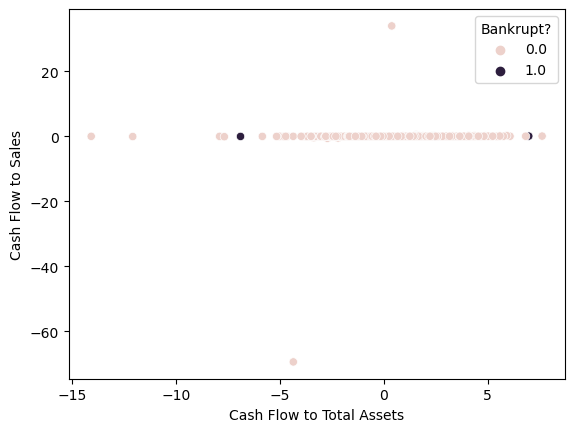

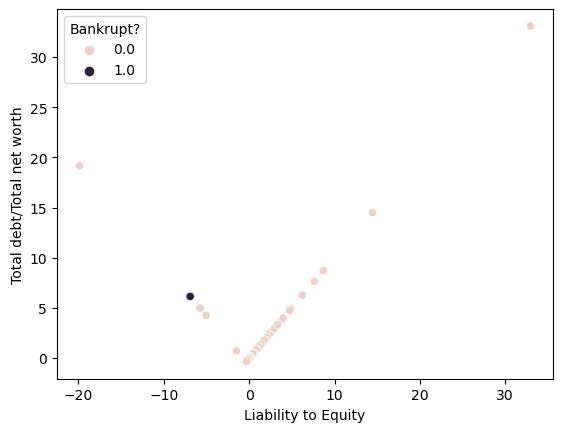

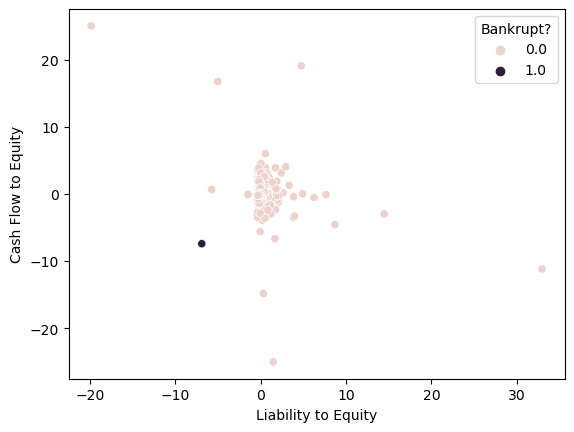

In [8]:
# index = 3

for index in range(len(correlation_diff)):
    sns.scatterplot(df_X_merged, x=correlation_diff[index][0], y=correlation_diff[index][1], hue="Bankrupt?")
    plt.show()

Totalt debt/Total net worth Fortement liée à Liability to Equity

c:\Users\benja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


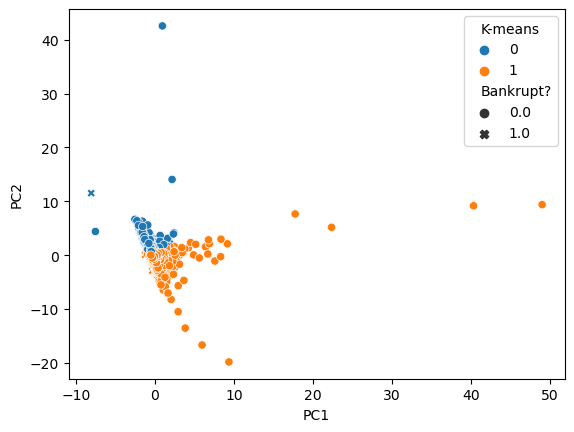

Pourcentage d'entreprises en faillites dans même cluster : 
Cluster 0 : 10.232558139534884
Cluster 1 : 89.76744186046511
Pourcentage d'entreprises en non faillites dans même cluster : 
Cluster 0 : 15.96469495199752
Cluster 1 : 84.03530504800247


In [12]:
nombre_clusters_kmeans = 2
cls = KMeans(n_clusters=nombre_clusters_kmeans, init="random")
df_X_interesting = df_X_merged.drop(columns=['Bankrupt?'])[list(interesting_columns)]
cls.fit(df_X_interesting)
labels_kmeans = pd.Series(cls.labels_, name="K-means")
df_X["K-means"] = labels_kmeans
scatterplot_pca(data=df_X_interesting, hue=labels_kmeans, style=df_X['Bankrupt?'])
plt.show()


print("Pourcentage d'entreprises en faillites dans même cluster : ")
df_test = df_X[df_X["Bankrupt?"] == 1]
for i in range(0, nombre_clusters_kmeans):
    df_test2 = df_X[df_X["Bankrupt?"] == 1]
    df_test2 = df_test2[df_test2["K-means"] == i]
    print(f"Cluster {i} : {len(df_test2.index)/len(df_test.index) * 100}")

print("Pourcentage d'entreprises en non faillites dans même cluster : ")
df_test_bis = df_X[df_X["Bankrupt?"] == 0]
for i in range(0, nombre_clusters_kmeans):
    df_test2_bis = df_X[df_X["Bankrupt?"] == 0]
    df_test2_bis = df_test2_bis[df_test2_bis["K-means"] == i]
    print(f"Cluster {i} : {len(df_test2_bis.index)/len(df_test_bis.index) * 100}")

### Comparaison répartition (Mann-Whitney) :

In [9]:
from data_prep import data_preparation
from scipy import stats

La répartition des individus est différente pour la variable  ROA(C) before interest and depreciation before interest   : pvalue :  4.177323600370985e-76
La répartition des individus est différente pour la variable  ROA(A) before interest and % after tax   : pvalue :  2.5193806608990814e-75
La répartition des individus est différente pour la variable  ROA(B) before interest and depreciation after tax   : pvalue :  1.7348445831791926e-76
La répartition des individus est différente pour la variable  Operating Gross Margin   : pvalue :  3.4505679527418476e-34
La répartition des individus est différente pour la variable  Realized Sales Gross Margin   : pvalue :  1.0319878021061604e-33
La répartition des individus est différente pour la variable  Operating Profit Rate   : pvalue :  8.43928063143914e-52
La répartition des individus est différente pour la variable  Pre-tax net Interest Rate   : pvalue :  1.5303595661345527e-73
La répartition des individus est différente pour la variable  Afte

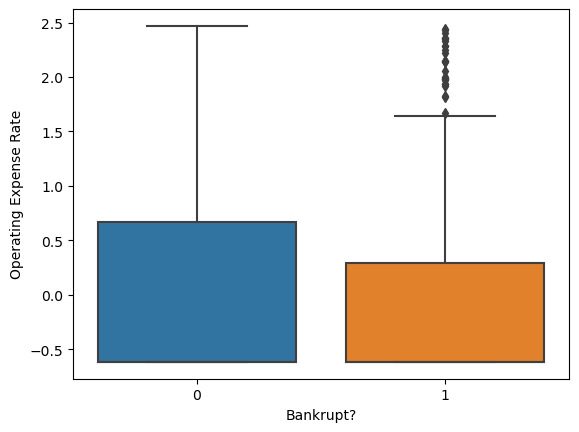

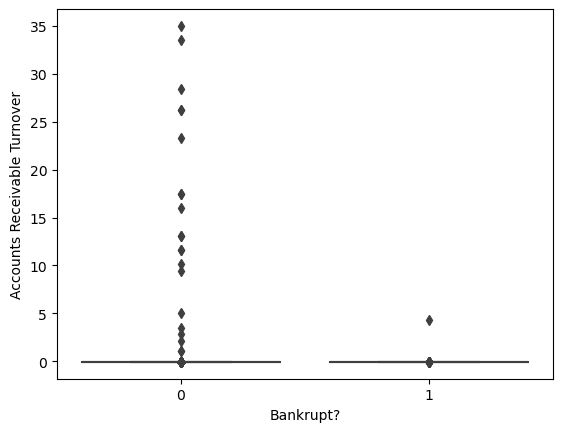

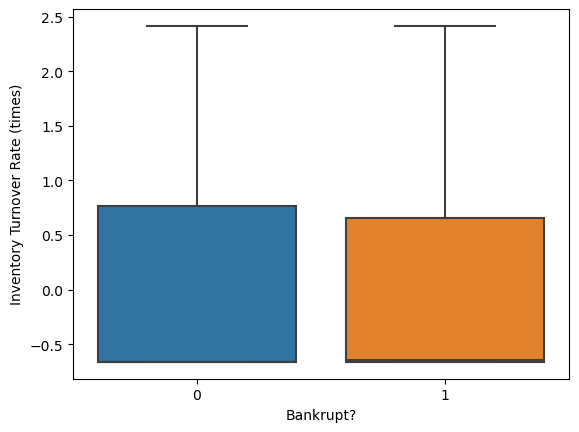

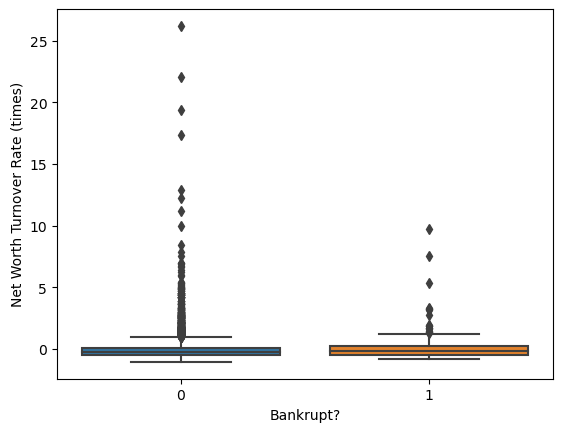

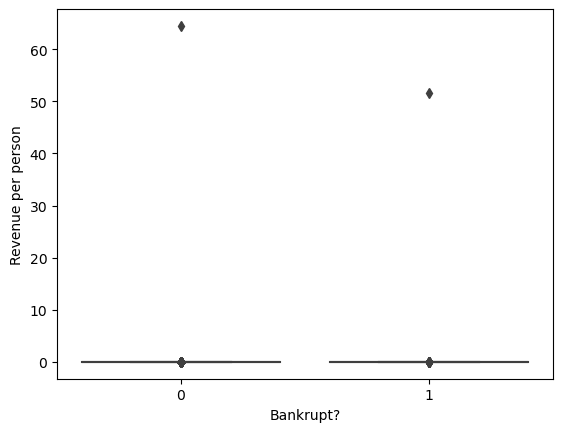

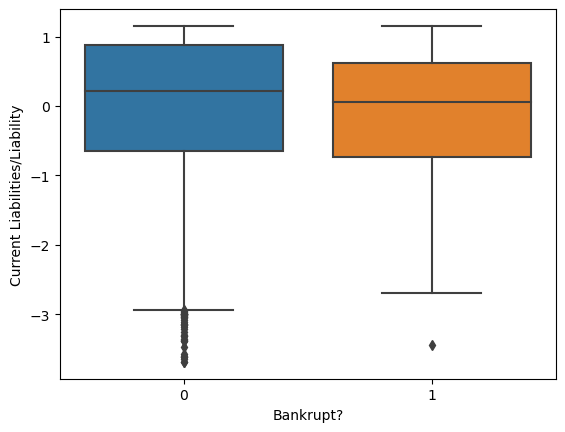

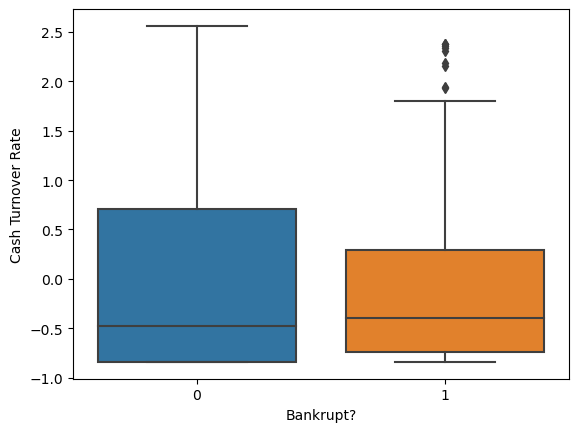

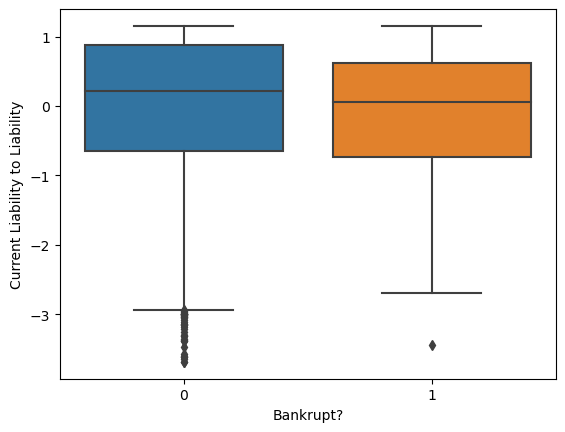

In [22]:
df_X, df_Y = data_preparation(get_all_columns=True)
df_X_merged = df_X
df_X_merged["Bankrupt?"] = df_Y
X_noBank_0 = df_X.loc[df_Y == 0]
X_noBank_1 = df_X.loc[df_Y == 1]

var_same_repartition = []
var_diff_repartition = []

for col_name in X_noBank_0.columns:
    pvalue = stats.mannwhitneyu(X_noBank_0[col_name], X_noBank_1[col_name]).pvalue
    if pvalue >= 0.01:
        print("La répartition des individus est la même pour la variable ", col_name, "  : pvalue : ",pvalue)
        var_same_repartition.append(col_name)
    else :
        print("La répartition des individus est différente pour la variable ", col_name, "  : pvalue : ",pvalue)
        var_diff_repartition.append(col_name)

print(len(var_diff_repartition))
print(var_same_repartition)
print(len(var_same_repartition))

for col_name in var_same_repartition:
    sns.boxplot(df_X_merged, y=col_name, x="Bankrupt?")
    plt.show()

In [ ]:
for col_name in var_same_repartition:
    sns.boxplot(df_X_merged, y=col_name, x="Bankrupt?")
    plt.show()

### Etude variables liées